In [23]:
# Recurrent Neural Network for Google Stock Price Prediction 
# Created by Suraj Bansal
# March 25, 2020

# Importing the libraries

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as plt
import keras

from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

#Importing specific functions from Keras

from keras import layers
from keras import models
from keras import datasets 

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Flatten


In [24]:
# Importing the dataset and converting into a dataframe

train_data = pd.read_csv('Google_Stock_Price_Train.csv')

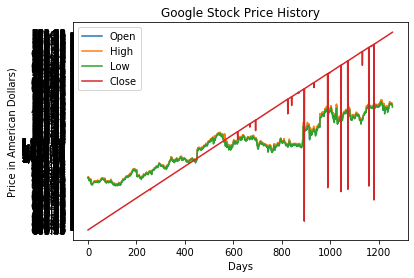

In [25]:
plt.figure()
plt.plot(train_data["Open"])
plt.plot(train_data["High"])
plt.plot(train_data["Low"])
plt.plot(train_data["Close"])
plt.title('Google Stock Price History')
plt.ylabel('Price in American Dollars)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

In [26]:
# Checking how many datapoints exist in the portfolio
train_data.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


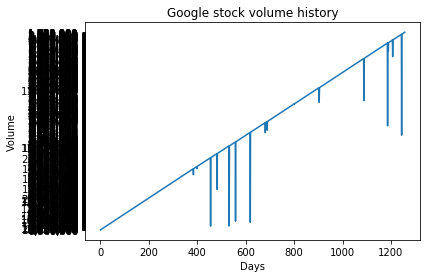

In [27]:
#Visualizing stock volume
# Notice the massive spike around 

plt.figure()
plt.plot(train_data["Volume"])
plt.title('Google stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [28]:
#Checking for any empty values 
print("Analyzing the data for null values\n", train_data.isna().sum())

Analyzing the data for null values
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [29]:
#Convert the vector into a 2-D numpy array
#Only retaining values from the Open column

train_data = train_data.iloc[:, 1:2].values

In [30]:
train_data

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [31]:
scalar = MinMaxScaler(feature_range = (0,1))
train_data = scalar.fit_transform(train_data)

In [32]:
train_data.shape

(1258, 1)

In [33]:
x_train = train_data[0:1257]
y_train = train_data[1:1258]

x_train = np.reshape(x_train, (1257,1,1))

In [34]:
x_train.shape

(1257, 1, 1)

In [35]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (None, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(0.2, activation = "softmax"))

model.add(layers(Flatten))
model.add(Dense(units = 1))

model.summary()

TypeError: ('Keyword argument not understood:', 'activation')

In [ ]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size = 32, verbose = 1, epochs = 50)

In [ ]:
test_data = pd.read_csv('Google_Stock_Price_Test.csv')
stock_price_real = test_data.iloc [: , 1:2].values
stock_price_real

In [ ]:
inputs = np.reshape(scalar.transform(stock_price_real), (20, 1, 1))

stock_prediction = scalar.inverse_transform(model.predict(inputs))

In [ ]:
plt.plot(stock_prediction, label = 'Predicted Google Stock Price')
plt.plot(stock_price_real, label = 'Real Google Stock Price')
plt.title("Google Stock Price Prediction with LSTM's")
plt.xlabel('Time (measured in days)')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
real_stock_price_train = pd.read_csv('Google_Stock_Price_Train.csv')
real_stock_price_train = real_stock_price_train.iloc[:,1:2].values
predicted_stock_price_train = scalar.inverse_transform(model.predict(x_train))

In [ ]:
plt.plot(real_stock_price_train, label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_train, label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse_value = math.sqrt(mean_squared_error(stock_price_real, stock_prediction))
rmse_value